In [7]:
#################################################################################################
## Import Section & Session creation

from data_session import Session
import numpy as np
import matplotlib.pyplot as plt

file_name = 'V1_SESSION_B20141210_1.mat'

s = Session(file_name,normalized=False)

##TO FIX
stimulus_offset = 228


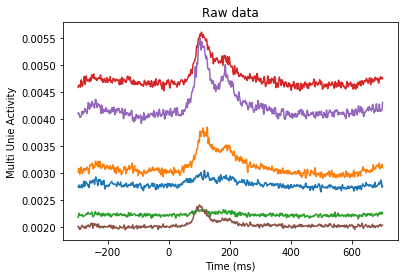

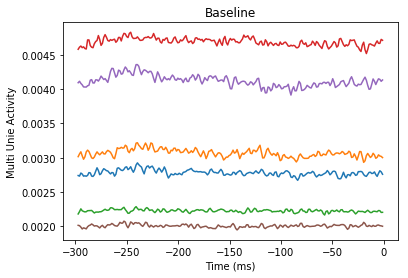

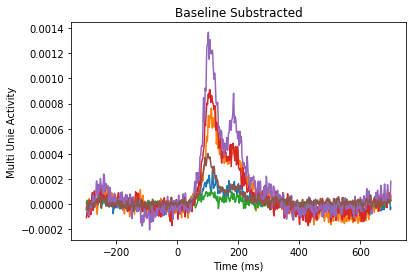

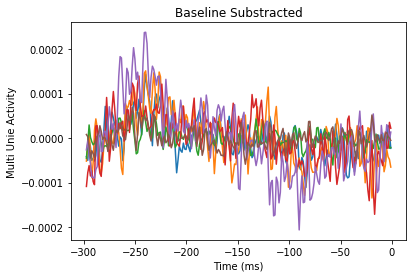

In [8]:
#################################################################################################
##Substracting mean baseline activity

##We use seen data here and contrast #3 
a = s.get_data("seen")[3][:,:,:]

##Extracting seen data, avereging over the trials for each electrode
b = s.average_over(a,time=False,channels=False,trials=True)
##Computing baseline
pre_stim_activity = b[0:stimulus_offset,:]
baseline = s.average_over(pre_stim_activity,time=True)
##Plotting graphs
s._core_figure_1(b,"Raw data",1,True)
s._core_figure_1(pre_stim_activity ,"Baseline",1,True,time_window=(0,stimulus_offset))
s._core_figure_1(b-baseline,"Baseline Substracted",1,True)
s._core_figure_1(pre_stim_activity-baseline,"Baseline Substracted",1,True,time_window=(0,stimulus_offset))



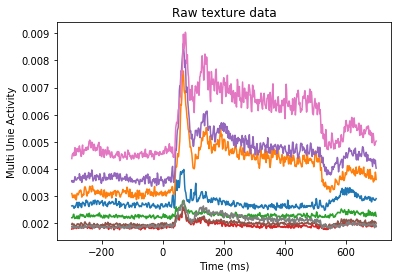

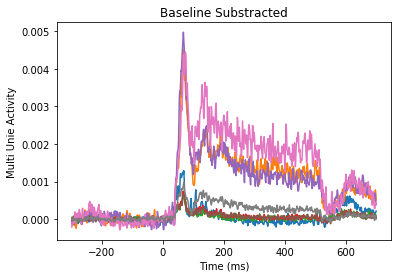

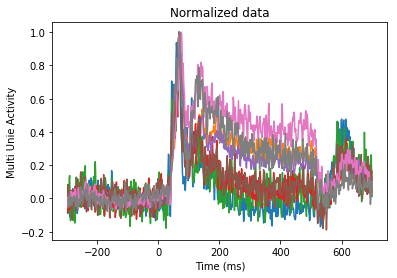

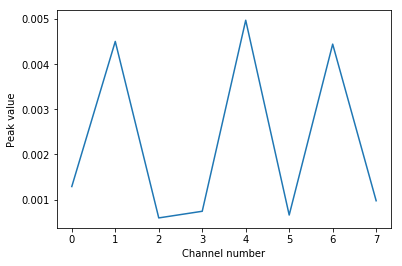

In [4]:
#################################################################################################
##Normalization with peak contrast

##Getting the texture
a = s.get_data("texture")[0]
#Averaging over trials for each elec
b = s.average_over(a,time=False,channels=False,trials=True)
##Computing baseline
pre_stim_activity = b[0:stimulus_offset,:]
baseline = s.average_over(pre_stim_activity,time=True)
#Computing the peak value
d = np.max(b-baseline,axis=0)
#Plotting the graphs
s._core_figure_1(b,"Raw texture data",1,True)
s._core_figure_1(b-baseline,"Baseline Substracted",1,True)
s._core_figure_1((b-baseline)/d,"Normalized data",1,True)
plt.plot(d)
plt.xlabel("Channel number")
plt.ylabel("Peak value")
plt.show()

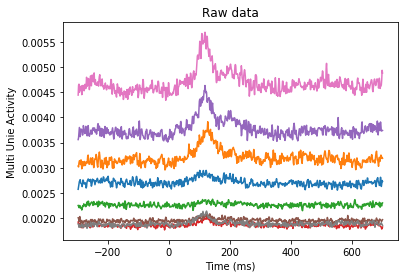

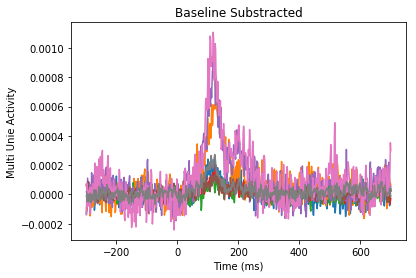

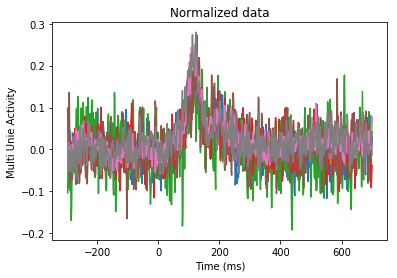

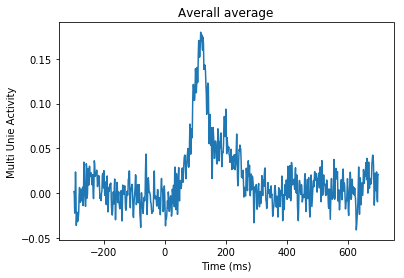

In [6]:
#################################################################################################
#Full normalisation
raw_data = s.get_data("seen")[3]
texture_data = s.get_data("texture")[0]

#Average data over trials
averaged_data = s.average_over(raw_data,time=False,channels=False,trials=True)
bb = s.average_over(s.get_data("seen"),time=False,channels=False,trials=True,contrast=True)
#Average texture data over trials
texture_data_averaged = s.average_over(texture_data,time=False,channels=False,trials=True)
#Compute baselines
texture_baseline = s.average_over(texture_data_averaged[0:stimulus_offset],time=True)
data_baseline = s.average_over(averaged_data[0:stimulus_offset],time=True)

max_peak = np.max(texture_data_averaged-texture_baseline,axis=0)
normalized_data = (averaged_data-data_baseline)/max_peak
s._core_figure_1(averaged_data,"Raw data",1,True)
s._core_figure_1(averaged_data-data_baseline,"Baseline Substracted",1,True)
s._core_figure_1(normalized_data,"Normalized data",1,True)
c = np.nanmean(normalized_data,1)
s._core_figure_1(c,"Averall average",1,True)




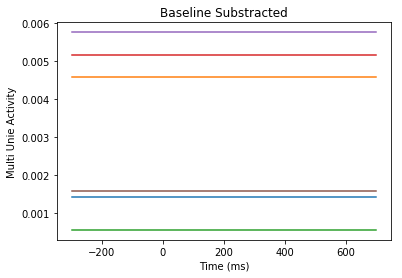

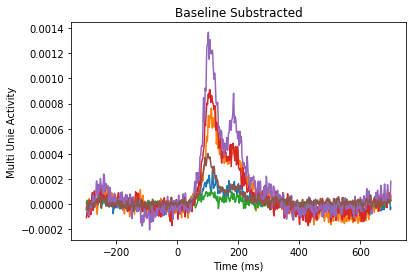

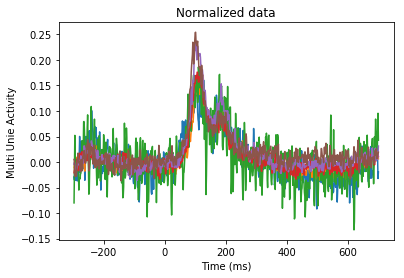

In [96]:
e = np.ones((763,6))
e.shape
f = e*max_peak
s._core_figure_1(f,"Baseline Substracted",1,True)
s._core_figure_1(averaged_data-data_baseline,"Baseline Substracted",1,True)
s._core_figure_1(normalized_data,"Normalized data",1,True)



In [110]:
texture_baseline-data_baseline

array([-2.9648887e-05, -6.3799322e-05, -1.5608966e-05, -1.6524736e-04,
       -9.2048664e-05,  9.3688723e-06], dtype=float32)

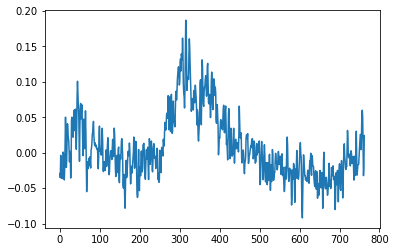

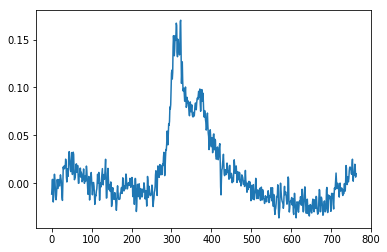

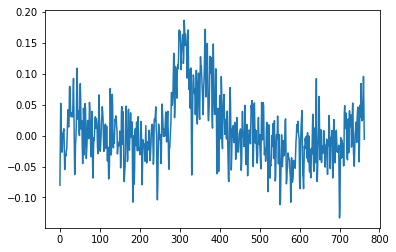

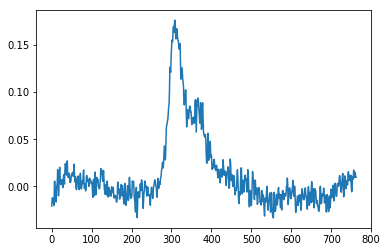

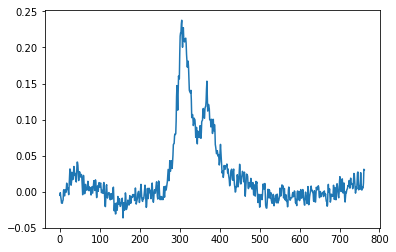

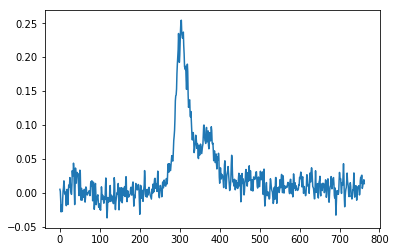

In [99]:
for i in range(6):
    e = normalized_data[:,i]


    plt.plot(e)
    plt.show()

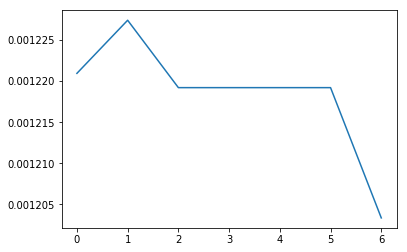

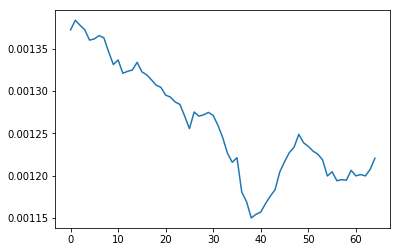

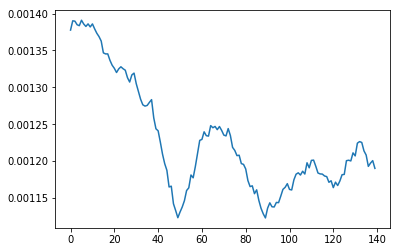

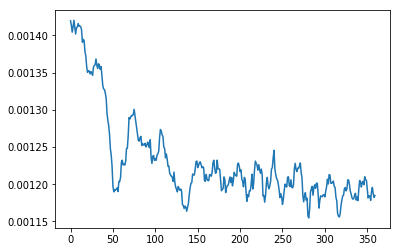

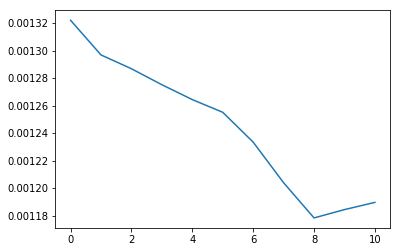

<Figure size 432x288 with 0 Axes>

In [103]:
#Variance decrease over trials
for i in range(5):
    a = s.get_data("seen")[i]
    c = s.smoother(s.var_over(a,channels=True,time=True))
    plt.plot(c)
    plt.figure()